In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')


In [7]:
#Importing dataset
Dataset= pd.read_csv('Dataset.csv')
#Checking datatypes
Dataset.dtypes


Sr                   int64
Date                object
Room Amount        float64
Dine In Amount       int64
Takeaway Amount      int64
Bar Amount           int64
dtype: object

In [8]:
#Coverting Date column format to d-m-y format
Dataset['Date'] = pd.to_datetime(Dataset.Date, format="%d-%m-%Y")
#Fetching top 5 vaules from the data
Dataset.head()


,Sr,Date,Room Amount,Dine In Amount,Takeaway Amount,Bar Amount
0,1,2013-09-01,0.0,53722,0,7760
1,2,2013-09-02,0.0,39137,0,25239
2,3,2013-09-03,0.0,597,0,4127
3,4,2013-09-04,0.0,0,0,2273
4,5,2013-09-05,0.0,4999,0,12505


In [9]:
#Aganing cheking type for date that it coverted to date from object
Dataset.dtypes


Sr                          int64
Date               datetime64[ns]
Room Amount               float64
Dine In Amount              int64
Takeaway Amount             int64
Bar Amount                  int64
dtype: object

In [10]:
#Augmented Dickey–Fuller test on Bar Sales
Take_adt = Dataset['Takeaway Amount']
adfuller(Take_adt)


(-4.329833960737796,
 0.0003942362694810997,
 29,
 2972,
 {'1%': -3.4325522062723506,
  '5%': -2.862512990970051,
  '10%': -2.5672879492445415},
 63550.18003841093)

In [11]:
# Creating new datafram contiang column of Date and takeaway amount
Data_Take =Dataset[['Date','Takeaway Amount']]
Data_Take=Data_Take.set_index('Date')
#Fetching top 5 rows
Data_Take.head()


,Takeaway Amount
Date,
2013-09-01,0
2013-09-02,0
2013-09-03,0
2013-09-04,0
2013-09-05,0


In [12]:
#setting asfreq as d
Data_Take= Data_Take.asfreq('D')


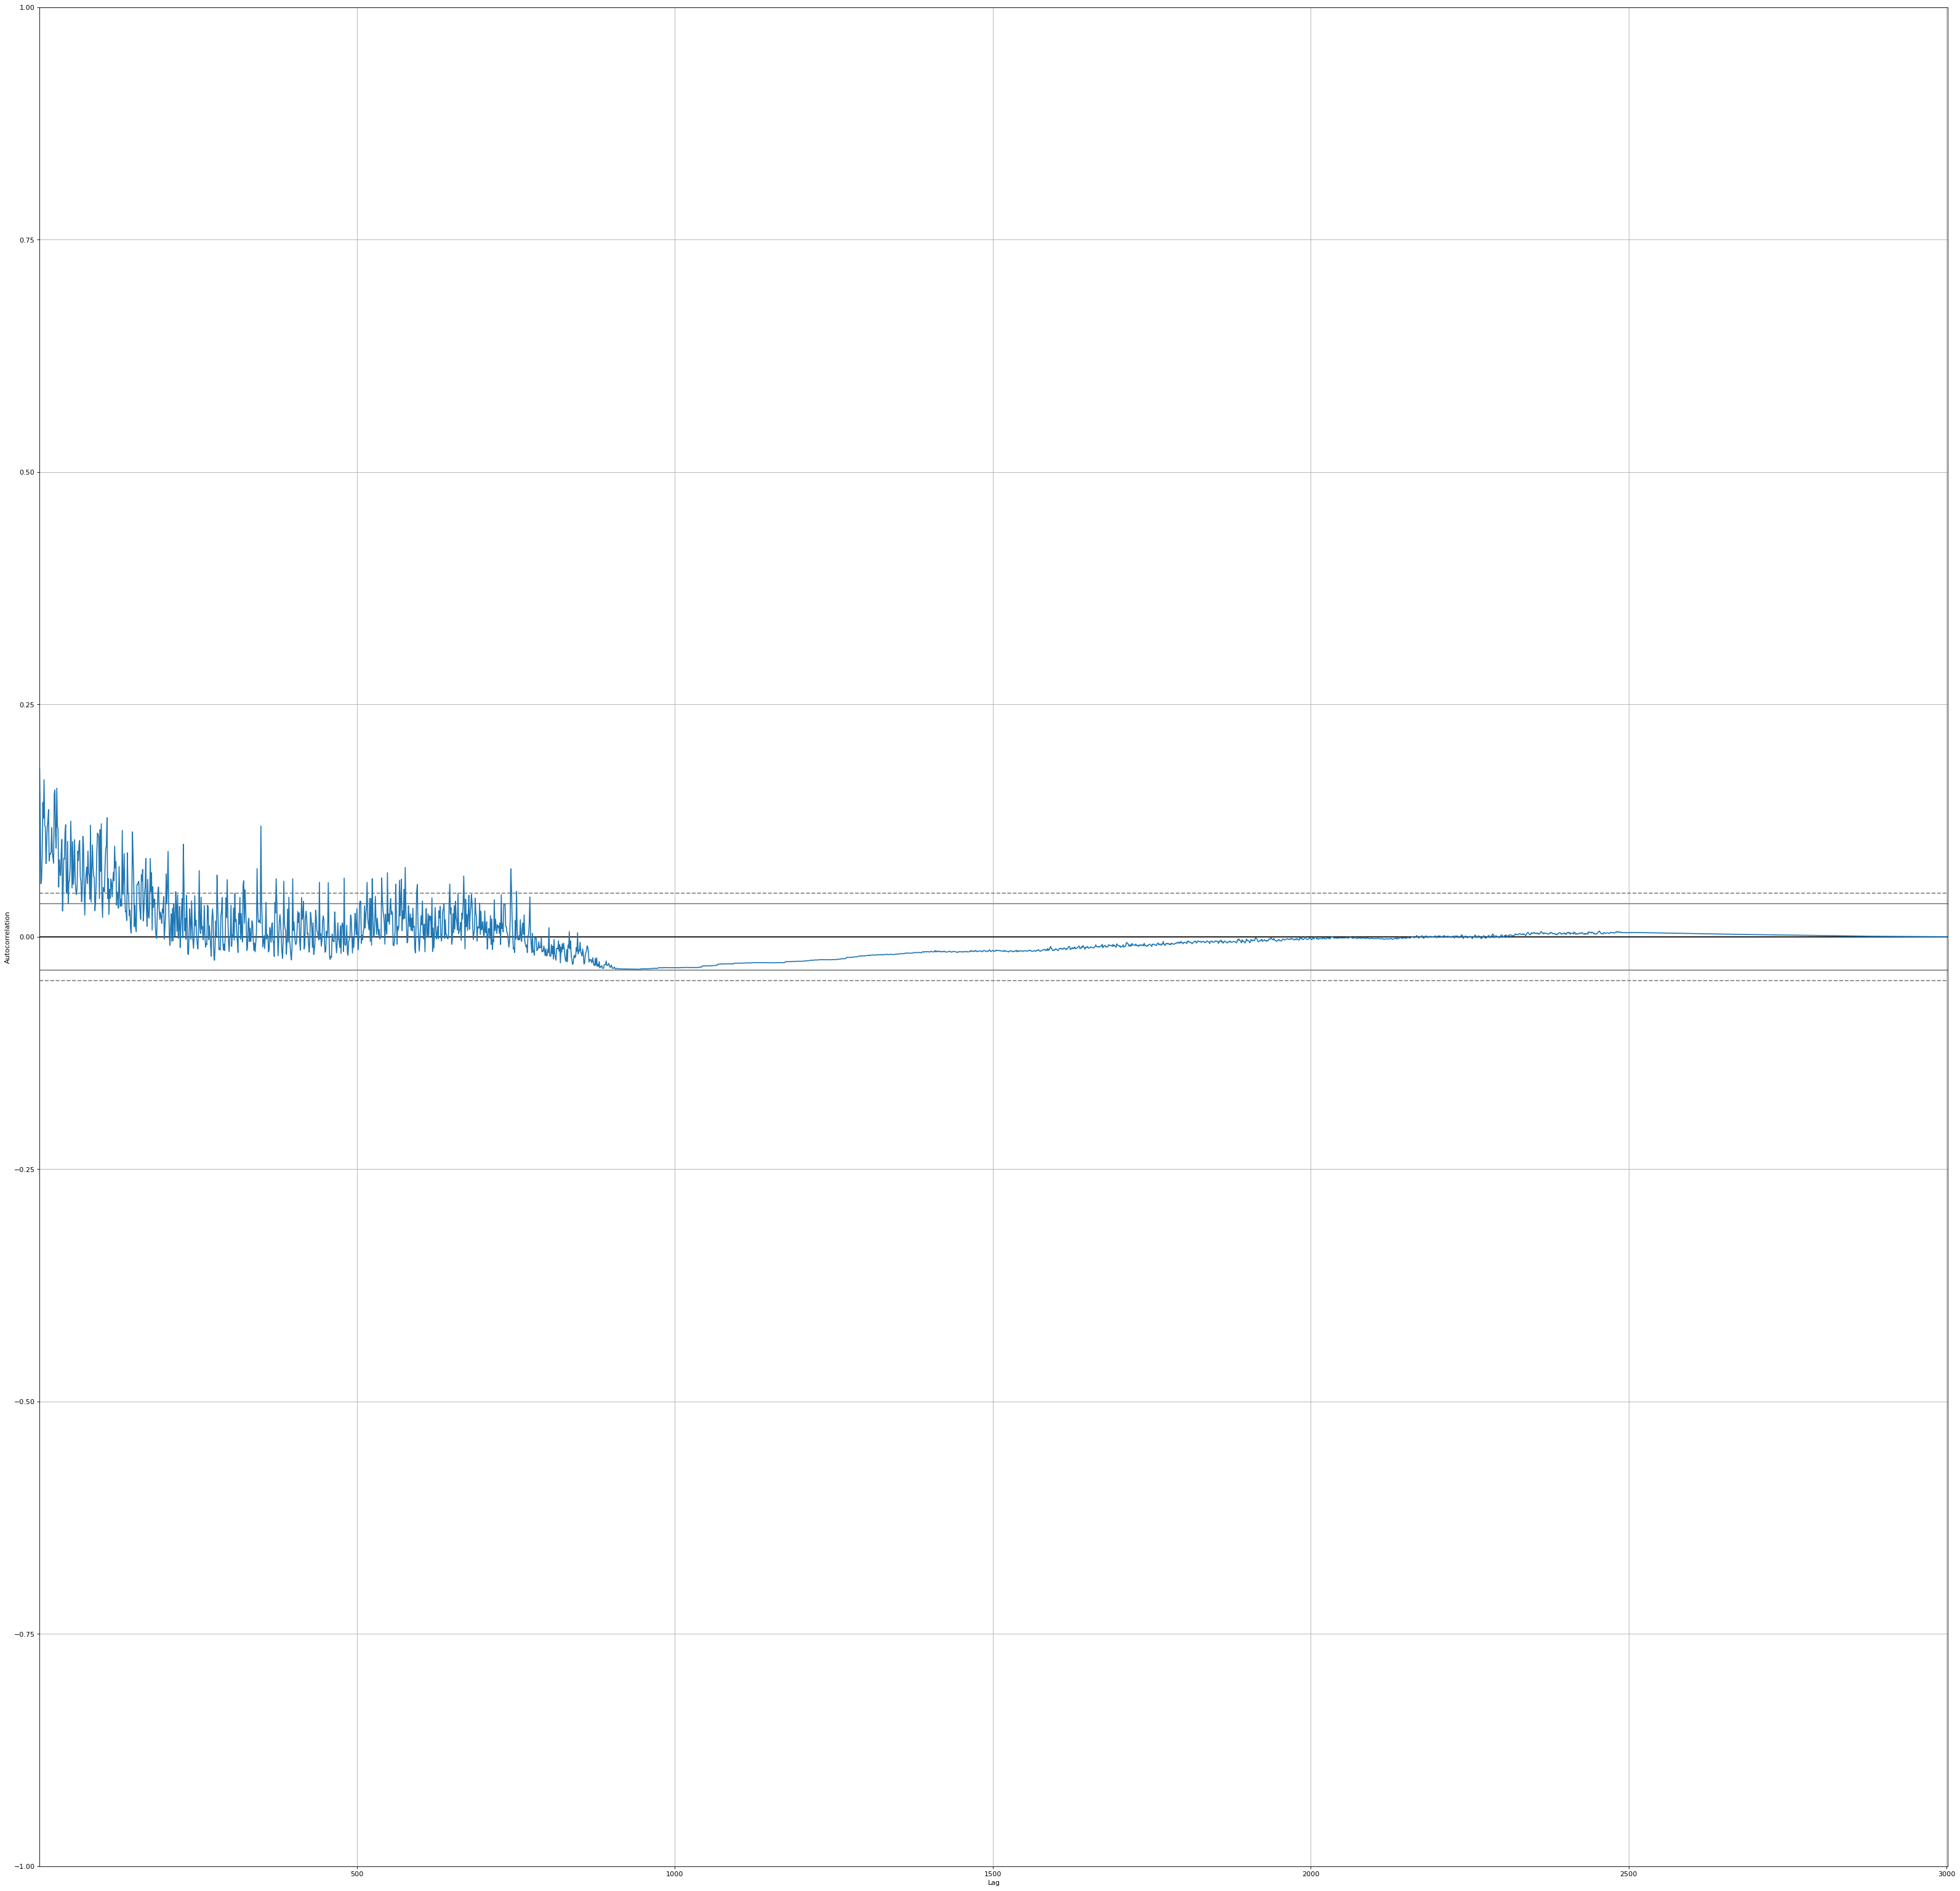

In [13]:
#ploting autocorrelation graph to find seasons
figure(figsize=(50,50),dpi=80)
autocorrelation_plot(Data_Take)
plt.show()


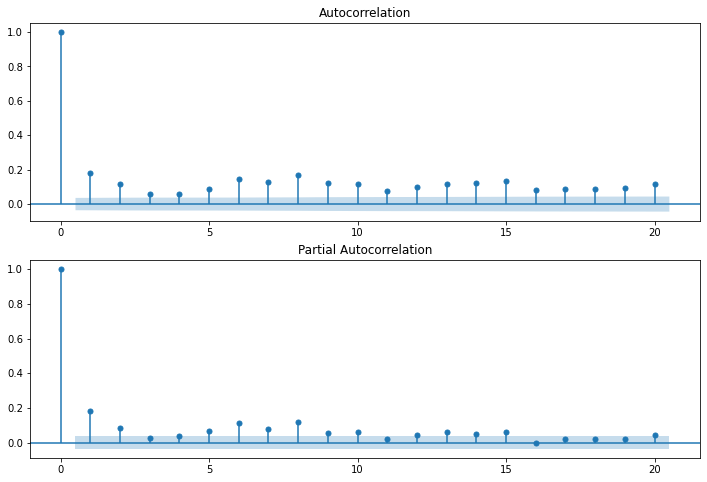

In [14]:
#plotting autocorrelation graph
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(Data_Take,lags=20, ax=ax1)
#plotting partial correlation graph
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Data_Take, lags=20, ax=ax2)


In [15]:
# spillting data for test and train set
Data_Take_Train = Data_Take.iloc[:len(Data_Take) - 600]
Data_Take_Test = Data_Take.iloc[len(Data_Take)-600:]
# creating new dataframe with half data for seasonal decompose
Data_Take_S = Data_Take.iloc[: len(Data_Take) - 1501]


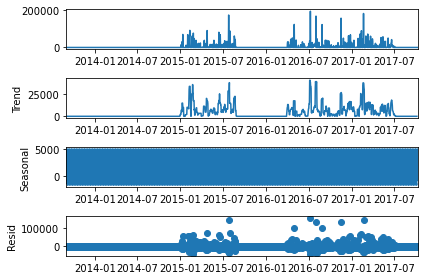

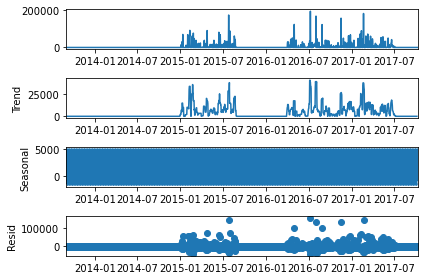

In [16]:
#plotting seasonal decompose chart
res = seasonal_decompose(Data_Take_S)
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(500,300))
res.plot()


In [17]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod =SARIMAX(Data_Take,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:64582.08680456784
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:64298.690848013815
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:65982.43789791361
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:63947.80987450605
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:64305.33651338541
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:64121.07247859186
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:64771.30114779991
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:63943.41822741016
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:64453.380845380896
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:64185.01110520233
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:65937.99060449735
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:64304.34606026784
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:64219.12411895139
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:64057.39908174906
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:64896.263301101506
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:64305.727755457454
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:65930.95528747066
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:65681.29649112435
ARIMA(

In [19]:
# training arima model
Take_Model_1= ARIMA(Data_Take_Train, order=(1,0,1)).fit(disp=0)


In [20]:
# printing arima model results
Take_Model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        Takeaway Amount   No. Observations:                 2402
Model:                     ARMA(1, 1)   Log Likelihood              -25959.794
Method:                       css-mle   S.D. of innovations          11950.154
Date:                Mon, 29 Nov 2021   AIC                          51927.588
Time:                        17:01:11   BIC                          51950.724
Sample:                    09-01-2013   HQIC                         51936.005
                         - 03-29-2020                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2602.2256   1273.446      2.043      0.041     106.318    5098.134
ar.L1.Takeaway Amount     0.9914      0.004    257.746      0.000       0.984       0.999
ma.L1.Takeaway Amount    -0.9536      0.009   -102.889      0.000      -0.972      -0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0086           +0.0000j            1.0086            0.0000
MA.1            1.0487           +0.0000j            1.0487            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
#prediciting sales with arima model
Arima_Pred=Take_Model_1.predict(start = Data_Take_Train.shape[0],end= Data_Take_Train.shape[0]+600)
Arima_Pred


2020-03-30     479.957055
2020-03-31     498.135633
2020-04-01     516.158499
2020-04-02     534.026987
2020-04-03     551.742421
                 ...     
2021-11-16    2589.632705
2021-11-17    2589.740571
2021-11-18    2589.847513
2021-11-19    2589.953539
2021-11-20    2590.058657
Freq: D, Length: 601, dtype: float64

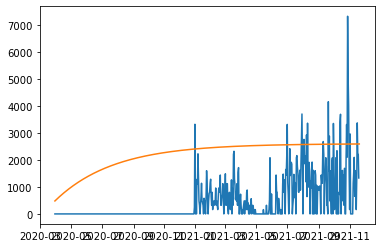

In [22]:
#plotting line garph actual vs predicted values
plt.plot(Data_Take_Test)
plt.plot(Arima_Pred)


In [23]:
# training sarimax model
Take_Model_2 = SARIMAX(Data_Take_Train, order=(0, 0, 0),
                              seasonal_order=(0, 1, 1, 12)).fit(disp=0)


In [24]:
#sarimax model results
Take_Model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:            Takeaway Amount   No. Observations:                 2402
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood              -25920.389
Date:                    Mon, 29 Nov 2021   AIC                          51844.777
Time:                            17:01:13   BIC                          51856.335
Sample:                        09-01-2013   HQIC                         51848.983
                             - 03-29-2020                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9329      0.004   -225.811      0.000      -0.941      -0.925
sigma2      1.531e+08   9.36e-12   1.64e+19      0.000    1.53e+08    1.53e+08
===================================================================================
Ljung-Box (L1) (Q):                  43.26   Jarque-Bera (JB):            772812.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             7.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        89.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+33. Standard errors may be unstable.
"""

In [25]:
# prediciting sales with sarima model
Sarima_Pred = Take_Model_2.predict(
    start=Data_Take_Train.shape[0], end=Data_Take_Train.shape[0]+600)
Sarima_Pred


2020-03-30    10.420204
2020-03-31    28.457990
2020-04-01    21.523270
2020-04-02    19.494654
2020-04-03    29.152917
                ...    
2021-11-16    33.574311
2021-11-17    14.184155
2021-11-18    33.779716
2021-11-19    16.775302
2021-11-20    10.420204
Freq: D, Name: predicted_mean, Length: 601, dtype: float64

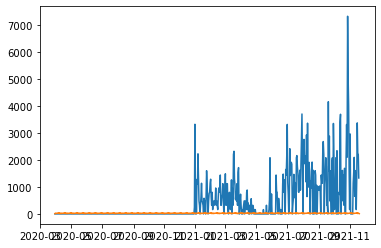

In [26]:
#plotting line garph actual vs predicted values
plt.plot(Data_Take_Test)
plt.plot(Sarima_Pred)


In [27]:
# training Exponential Smoothing model
Take_Model_3 = ExponentialSmoothing(Data_Take_Train,trend="add",seasonal="add",seasonal_periods=365).fit()


In [28]:
#Exponential Smoothing model results
Take_Model_3.summary()


Dep. Variable:,Takeaway Amount,No. Observations:,2402
Model:,ExponentialSmoothing,SSE,344540055489.164
Optimized:,True,AIC,45850.969
Trend:,Additive,BIC,47985.286
Seasonal:,Additive,AICC,45986.941
Seasonal Periods:,365,Date:,"Mon, 29 Nov 2021"
Box-Cox:,False,Time:,17:01:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0403571,alpha,True
smoothing_trend,0.0001,beta,True


In [29]:
# prediciting sales with Exponential Smoothing model
ES_Pred = Take_Model_3.predict(
    start=Data_Take_Train.shape[0], end=Data_Take_Train.shape[0]+600)
ES_Pred


2020-03-30     336.631767
2020-03-31     348.638107
2020-04-01     361.001519
2020-04-02     375.302457
2020-04-03     386.815239
                 ...     
2021-11-16    8350.843865
2021-11-17    8347.945078
2021-11-18    8361.412296
2021-11-19    8375.702397
2021-11-20    8388.413889
Freq: D, Length: 601, dtype: float64

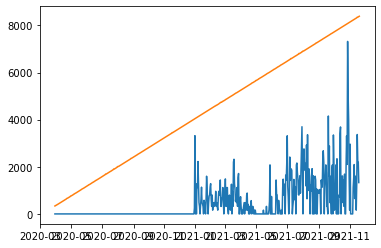

In [30]:
#plotting line garph actual vs predicted values
plt.plot(Data_Take_Test)
plt.plot(ES_Pred)
